## EDA(Exploratory Data Analysis) of Supermarket sales data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Get The Data

In [2]:
df = pd.read_csv("supermarket_sales.csv",index_col= 'Date')

# 1st 5 rows

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
1/5/2019,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
3/8/2019,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
3/3/2019,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
1/27/2019,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2/8/2019,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Finding The Null values for each column

In [3]:

print(df.isnull().sum(),"\nwe don't have any null values")

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64 
we don't have any null values


## shape of the dataframe

In [4]:
print(df.shape,"\nThis dataset contain: 1000 rows","\nThis dataset contain : 16 columns")

(1000, 16) 
This dataset contain: 1000 rows 
This dataset contain : 16 columns


## info about the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1/5/2019 to 2/18/2019
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income     

## statistical information

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [7]:
# checking for duplicates values
df[df.duplicated()]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,


## show the product categories in Supermarket

In [8]:
df["Product line"].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [9]:
# Count the product each product line category
df["Product line"].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

## Find how many sales has been done on each Product Category

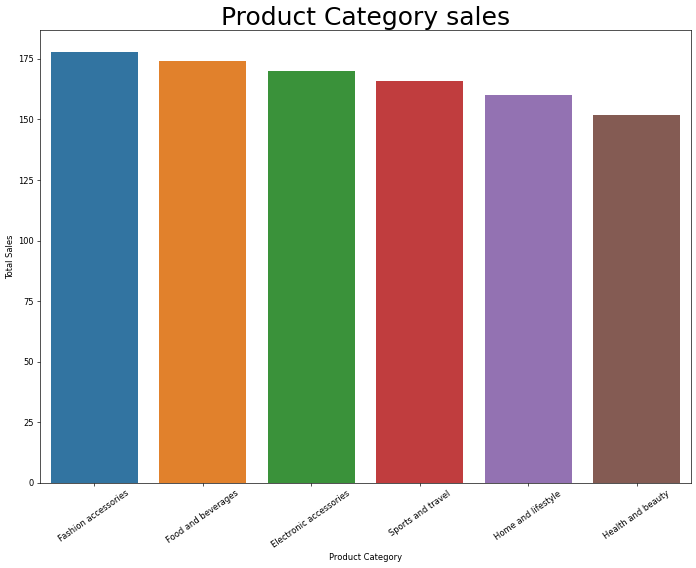

In [10]:
plt.figure(figsize=(14,10),dpi=60)

sns.countplot(data=df,x="Product line",order=df["Product line"].value_counts().index)
plt.style.use("fivethirtyeight")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")

plt.xticks(rotation=35)
plt.title("Product Category sales",fontsize=30)

plt.show()


## Find  sales of each city

In [11]:
#check each unique city
df["City"].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [12]:
df["City"].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

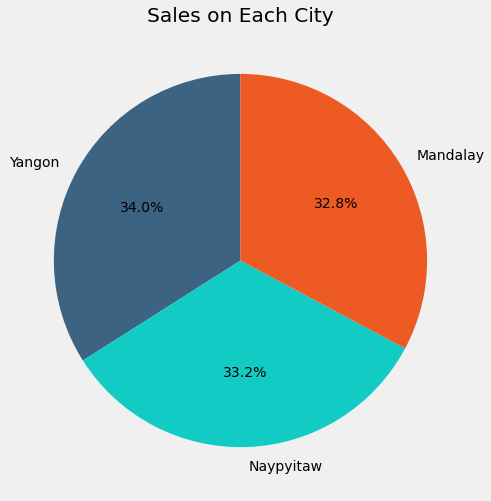

In [13]:
city_labels = df["City"].unique()

plt.figure(figsize=(10,8))
plt.pie(df["City"].value_counts(),
        labels=city_labels,
        colors=["#3c6382","#12CBC4","#EE5A24"],
        autopct='%1.1f%%',
        startangle=90)


plt.title("Sales on Each City")
plt.show()

## Which City has the most rating

In [14]:
df.groupby("City")["Rating"].count()

City
Mandalay     332
Naypyitaw    328
Yangon       340
Name: Rating, dtype: int64

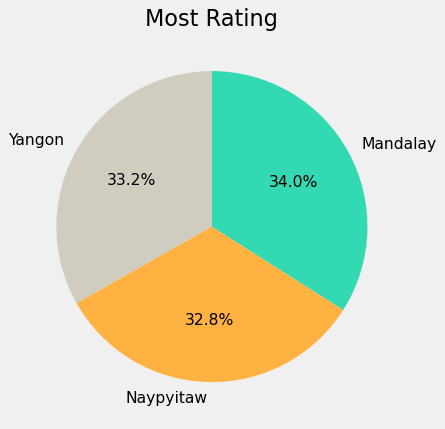

In [15]:
most_rating = df.groupby("City")["Rating"].count()

plt.figure(figsize=(10,6),dpi=80)
plt.pie(most_rating,labels=city_labels,colors=["#d1ccc0","#ffb142","#33d9b2"],autopct="%1.1f%%",startangle=90)


plt.title("Most Rating")
plt.show()

## show Each product line Category unit price

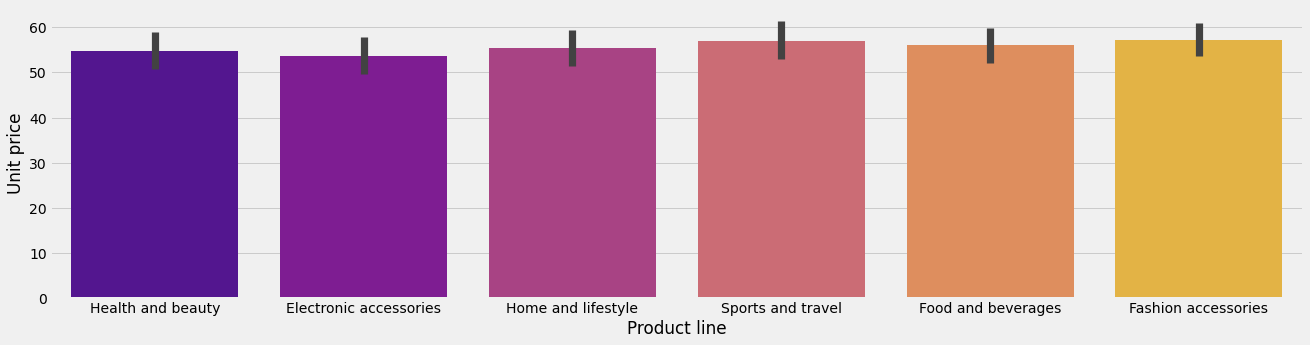

In [16]:
# sns.set_style()
plt.figure(figsize=(20,5))
sns.barplot(data=df,x="Product line",y="Unit price",palette="plasma")
plt.show()


## Show the which Payment method most uses

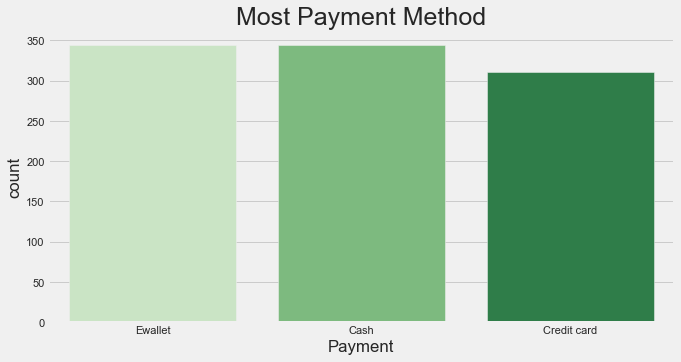

In [17]:
sns.set_theme()
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="Payment",palette="Greens")
plt.title("Most Payment Method",fontsize=25)
plt.show()

<AxesSubplot:xlabel='Payment', ylabel='count'>

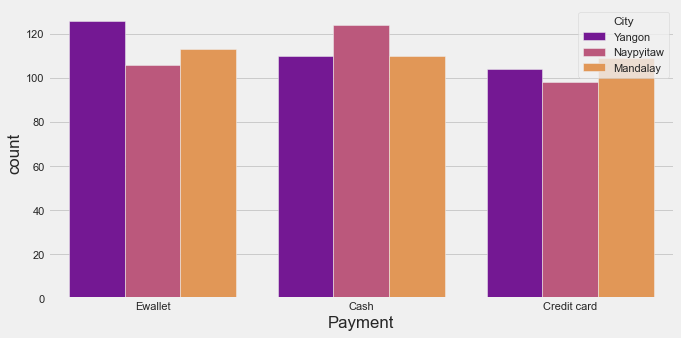

In [18]:
#Payment method based on City

plt.figure(figsize=(10,5))
plt.style.use("fivethirtyeight")
sns.countplot(data=df,x="Payment",hue="City",palette="plasma")

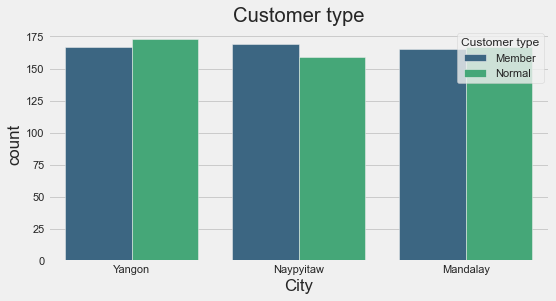

In [19]:
sns.set_theme()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,4))
sns.countplot(data=df,x="City",hue="Customer type",palette="viridis")
plt.title("Customer type")
plt.show()


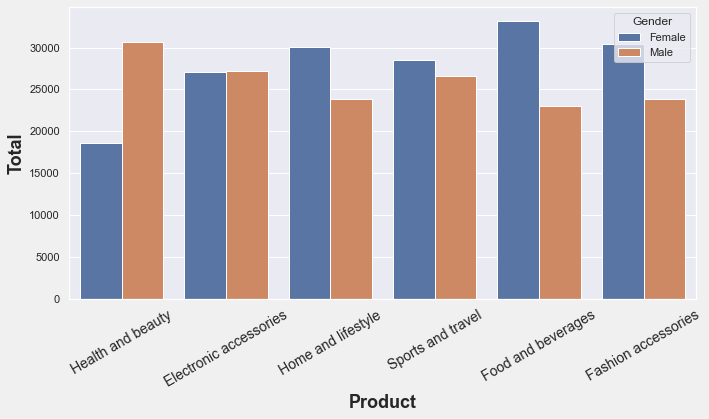

In [20]:
##let's visualize gender, product line vs total 

plt.figure(figsize=(10,5))

sns.set_theme()
sns.barplot(data=df,x='Product line',y='Total',hue='Gender',estimator=sum,ci=None)
plt.xticks(rotation=30,fontsize=14)
plt.xlabel('Product',fontsize=18,fontweight='bold')
plt.ylabel("Total",fontsize=18,fontweight='bold')


plt.show()

